Whole-year threshold for 10th percentile (left tail): 8.1493
Whole-year threshold for 5th percentile (left tail): 8.1408
Whole-year dthr (Range: max - min): 0.1736

--- Processing Season: DJF ---
Seasonal pH data successfully extracted.

Applying whole-year threshold (10th percentile) for season DJF: 8.1493

Applying whole-year threshold (5th percentile) for season DJF: 8.1408

--- pH Risk Metrics ---

Threshold: 10th percentile (Value = 8.1493)
Historical pH:
  Exceedance Probability (pH below threshold): 0.0000 ± 0.0000
  Normalized Intensity (deviation below threshold): nan ± 0.0000
  Hazard: 0.0000 ± 0.0000
Future SSP pH:
  Exceedance Probability (pH below threshold): 0.0000 ± 0.0000
  Normalized Intensity (deviation below threshold): nan ± 0.0000
  Hazard: 0.0000 ± 0.0000

Threshold: 5th percentile (Value = 8.1408)
Historical pH:
  Exceedance Probability (pH below threshold): 0.0000 ± 0.0000
  Normalized Intensity (deviation below threshold): nan ± 0.0000
  Hazard: 0.0000 ± 0.0000

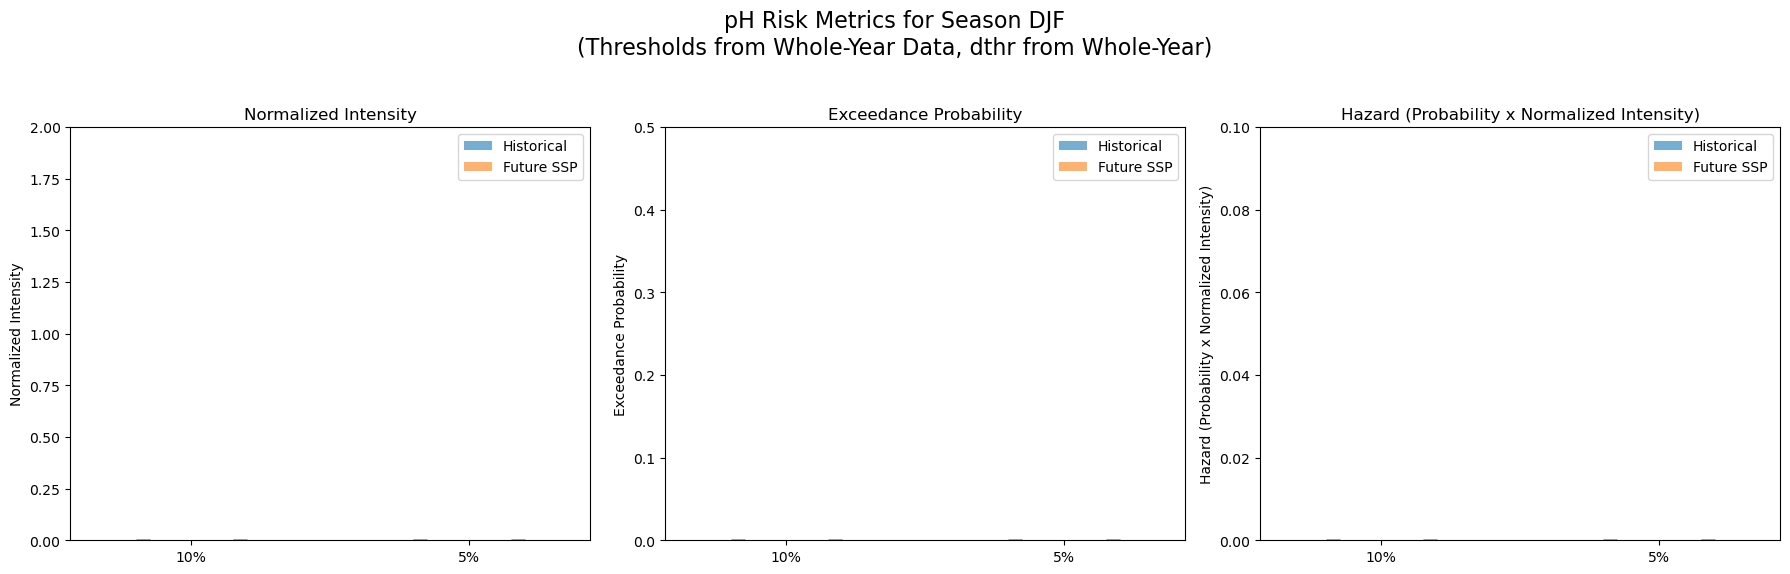

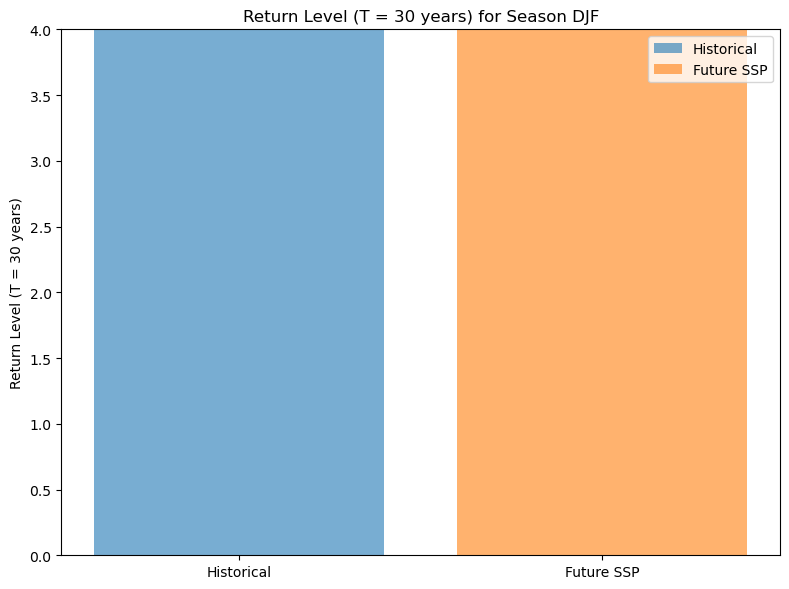


--- Processing Season: MAM ---
Seasonal pH data successfully extracted.

Applying whole-year threshold (10th percentile) for season MAM: 8.1493

Applying whole-year threshold (5th percentile) for season MAM: 8.1408

--- pH Risk Metrics ---

Threshold: 10th percentile (Value = 8.1493)
Historical pH:
  Exceedance Probability (pH below threshold): 0.0006 ± 0.0001
  Normalized Intensity (deviation below threshold): 0.0112 ± 0.0019
  Hazard: 0.0000 ± 0.0000
Future SSP pH:
  Exceedance Probability (pH below threshold): 0.0637 ± 0.0013
  Normalized Intensity (deviation below threshold): 0.0688 ± 0.0011
  Hazard: 0.0044 ± 0.0001

Threshold: 5th percentile (Value = 8.1408)
Historical pH:
  Exceedance Probability (pH below threshold): 0.0000 ± 0.0000
  Normalized Intensity (deviation below threshold): nan ± 0.0000
  Hazard: 0.0000 ± 0.0000
Future SSP pH:
  Exceedance Probability (pH below threshold): 0.0365 ± 0.0010
  Normalized Intensity (deviation below threshold): 0.0532 ± 0.0013
  Hazard: 0

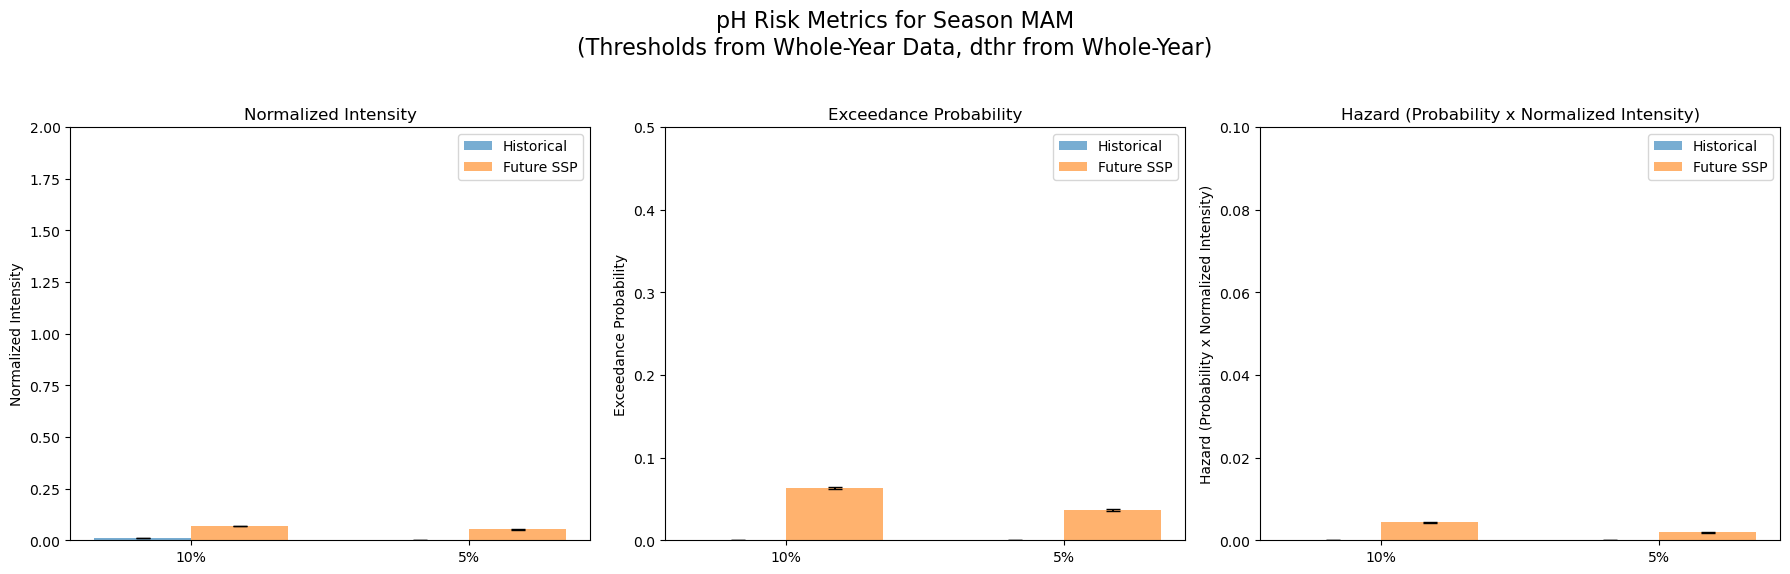

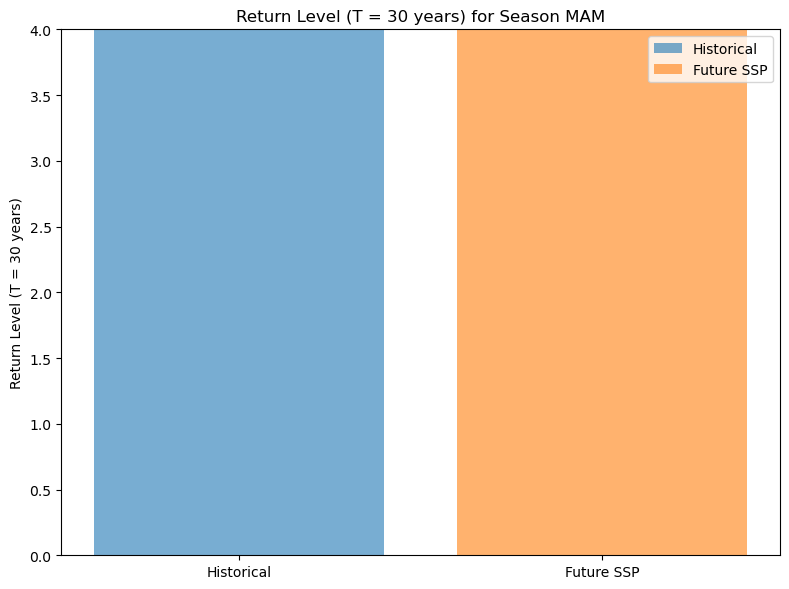


--- Processing Season: JJA ---
Seasonal pH data successfully extracted.

Applying whole-year threshold (10th percentile) for season JJA: 8.1493

Applying whole-year threshold (5th percentile) for season JJA: 8.1408

--- pH Risk Metrics ---

Threshold: 10th percentile (Value = 8.1493)
Historical pH:
  Exceedance Probability (pH below threshold): 0.2689 ± 0.0023
  Normalized Intensity (deviation below threshold): 0.0507 ± 0.0004
  Hazard: 0.0136 ± 0.0002
Future SSP pH:
  Exceedance Probability (pH below threshold): 0.5767 ± 0.0026
  Normalized Intensity (deviation below threshold): 0.1075 ± 0.0005
  Hazard: 0.0620 ± 0.0004

Threshold: 5th percentile (Value = 8.1408)
Historical pH:
  Exceedance Probability (pH below threshold): 0.1212 ± 0.0017
  Normalized Intensity (deviation below threshold): 0.0355 ± 0.0004
  Hazard: 0.0043 ± 0.0001
Future SSP pH:
  Exceedance Probability (pH below threshold): 0.4385 ± 0.0027
  Normalized Intensity (deviation below threshold): 0.0841 ± 0.0005
  Hazard

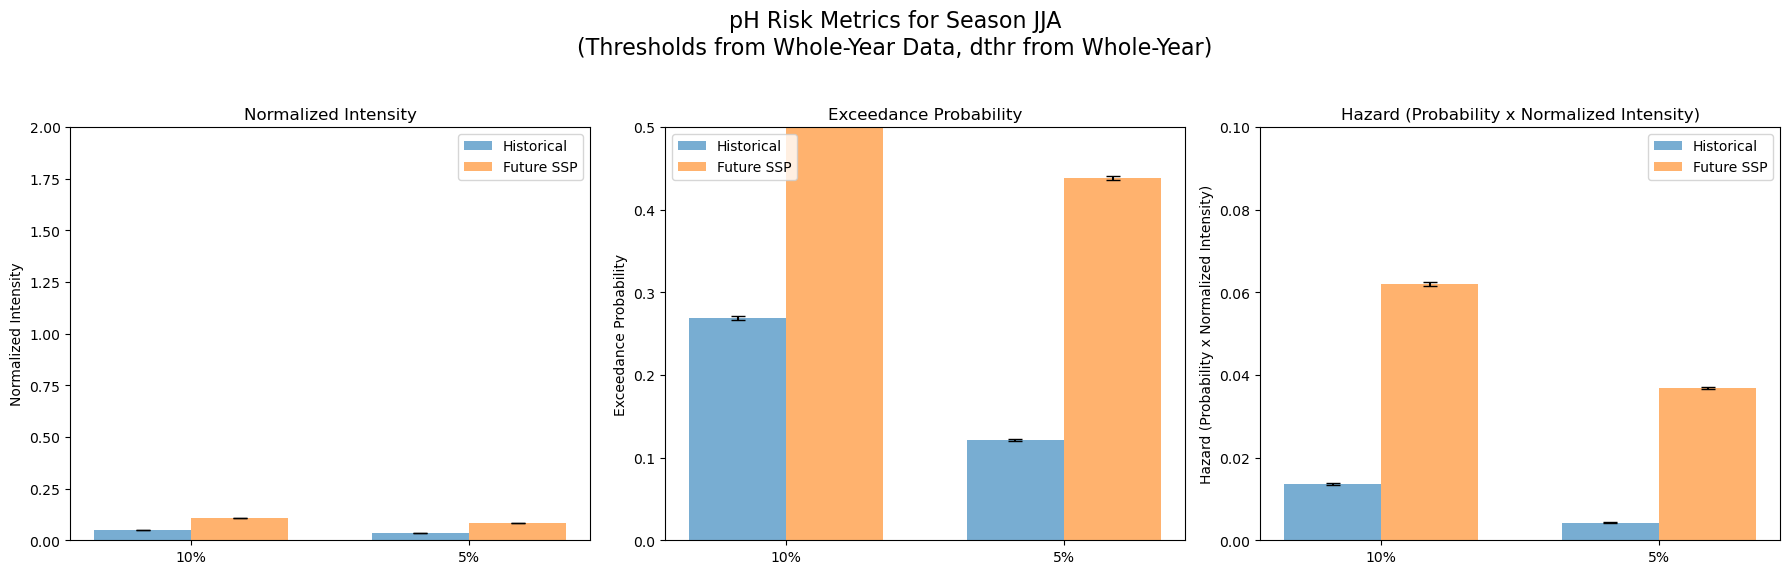

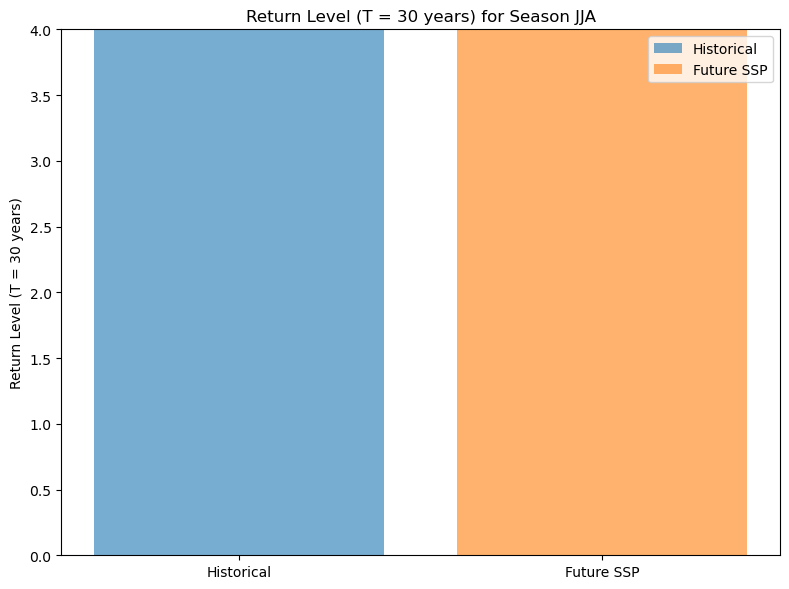


--- Processing Season: SON ---
Seasonal pH data successfully extracted.

Applying whole-year threshold (10th percentile) for season SON: 8.1493

Applying whole-year threshold (5th percentile) for season SON: 8.1408

--- pH Risk Metrics ---

Threshold: 10th percentile (Value = 8.1493)
Historical pH:
  Exceedance Probability (pH below threshold): 0.1288 ± 0.0019
  Normalized Intensity (deviation below threshold): 0.0608 ± 0.0005
  Hazard: 0.0078 ± 0.0001
Future SSP pH:
  Exceedance Probability (pH below threshold): 0.3021 ± 0.0024
  Normalized Intensity (deviation below threshold): 0.1145 ± 0.0008
  Hazard: 0.0346 ± 0.0004

Threshold: 5th percentile (Value = 8.1408)
Historical pH:
  Exceedance Probability (pH below threshold): 0.0781 ± 0.0015
  Normalized Intensity (deviation below threshold): 0.0348 ± 0.0004
  Hazard: 0.0027 ± 0.0001
Future SSP pH:
  Exceedance Probability (pH below threshold): 0.2289 ± 0.0024
  Normalized Intensity (deviation below threshold): 0.0936 ± 0.0009
  Hazard

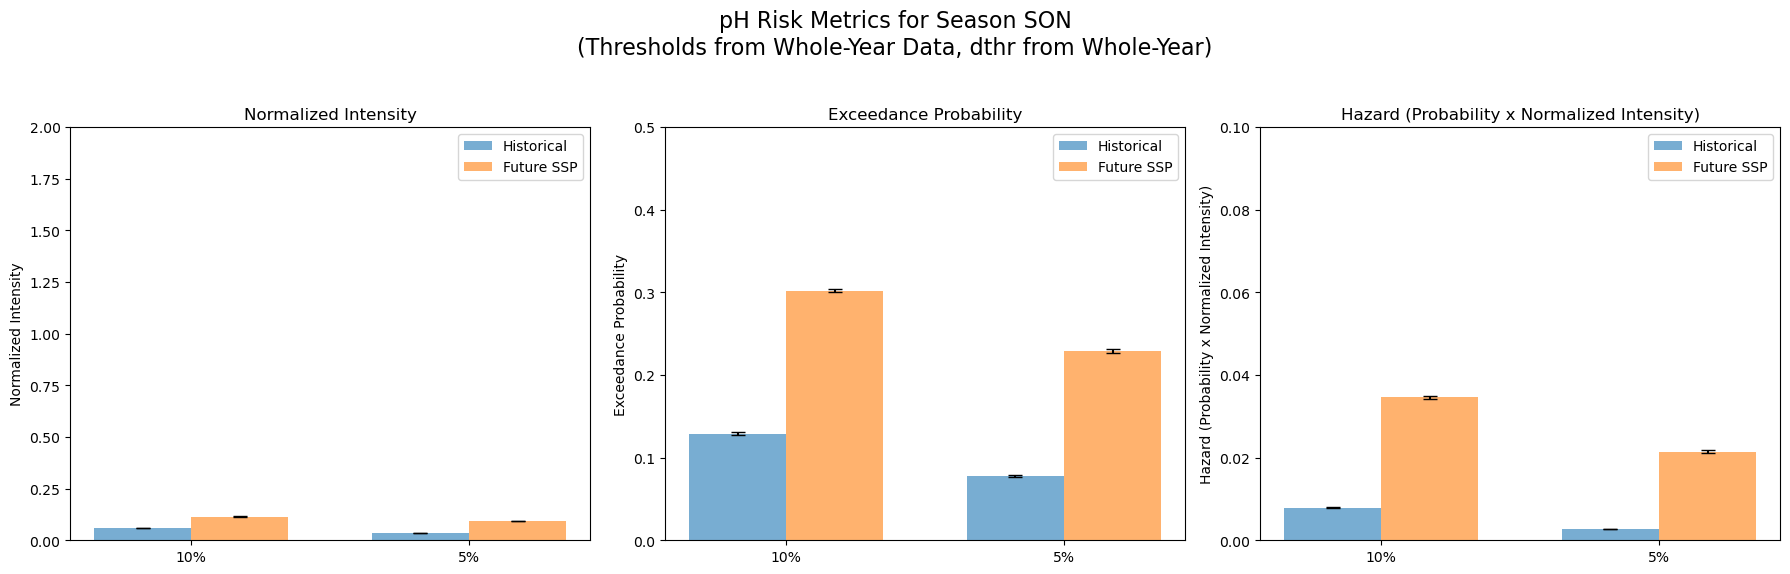

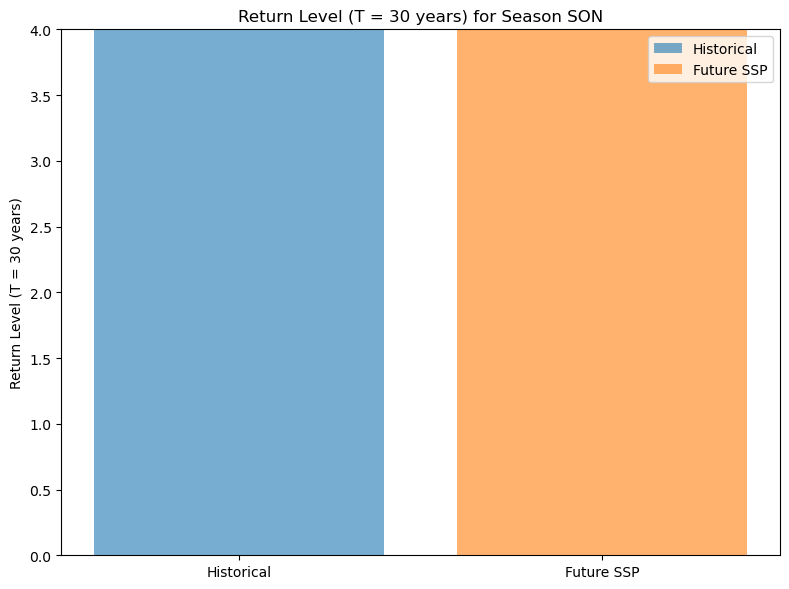

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Parameter Settings and Function Definitions
# ------------------------------
outdir = "/lfs/home/ioloi/lfs_dir/project_UCH/post_result/"
ship = "gj"
seasons = ["DJF", "MAM", "JJA", "SON"]  # List of seasons to loop over
n_bootstrap = 1000

# For left-tail analysis on pH, thresholds are at the 10th and 5th percentiles
threshold_percents = [10, 5]

# Global y-axis limits for plots (adjust as needed)
global_ylim_intensity   = (0, 2)    # For Normalized Intensity
global_ylim_probability = (0, 0.5)  # For Exceedance Probability
global_ylim_hazard      = (0, 0.1)  # For Hazard (Probability x Normalized Intensity)
global_ylim_return      = (0, 4)    # For Return Level (T = 30 years)

# Common y-axis labels
ylabel_intensity    = "Normalized Intensity"
ylabel_probability  = "Exceedance Probability"
ylabel_hazard       = "Hazard (Probability x Normalized Intensity)"
ylabel_return_level = "Return Level (T = 30 years)"

# ------------------------------
# Compute Thresholds Using Whole-Year Historical Data (pH)
# ------------------------------
# File paths for whole-year historical and SSP data (assumed variable: predicted_pH)
file_hist_year = f"/lfs/home/ioloi/lfs_dir/project_UCH/post_result/predicted_pH_hist_{ship}.nc"
file_ssp_year  = f"/lfs/home/ioloi/lfs_dir/project_UCH/post_result/predicted_pH_ssp_{ship}.nc"

# Read whole-year historical data and extract pH
try:
    data_hist_year = xr.open_dataset(file_hist_year)
    pH_hist_year = data_hist_year['predicted_pH'].values.flatten()
except (FileNotFoundError, KeyError) as e:
    print(f"Error reading whole-year historical data: {e}")
    exit()

# Compute left-tail thresholds and dthr from whole-year historical pH data
thresholds_year = []
for perc in threshold_percents:
    thresh_val = np.percentile(pH_hist_year, perc)
    thresholds_year.append(thresh_val)
    print(f"Whole-year threshold for {perc}th percentile (left tail): {thresh_val:.4f}")

dthr = np.max(pH_hist_year) - np.min(pH_hist_year)
print(f"Whole-year dthr (Range: max - min): {dthr:.4f}")

# ------------------------------
# Define Calculation Functions for pH Risk Metrics
# ------------------------------
def calc_metrics(data, threshold, dthr):
    """
    Calculate risk metrics using the raw data distribution.
    For pH, risk events occur when values are below the threshold.
    Intensity is computed as (threshold - mean(low pH values)) normalized by dthr.
    """
    mask = data < threshold
    n_total = len(data)
    n_exceed = np.sum(mask)
    if n_exceed == 0:
        return 0, np.nan, 0
    # Probability: fraction of values below threshold
    exceedance_prob = n_exceed / n_total
    # Intensity: average deviation below threshold, normalized by dthr.
    intensity = (threshold - np.mean(data[mask])) / dthr if dthr != 0 else np.nan
    hazard = exceedance_prob * intensity
    return exceedance_prob, intensity, hazard

def bootstrap_metrics(data, threshold, dthr, n_bootstrap=1000):
    """
    Compute the distribution of risk metrics using bootstrap resampling.
    """
    boot_probs = []
    boot_intensities = []
    boot_hazards = []
    n = len(data)
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        prob, inten, haz = calc_metrics(sample, threshold, dthr)
        if np.isnan(inten):
            continue
        boot_probs.append(prob)
        boot_intensities.append(inten)
        boot_hazards.append(haz)
    if len(boot_probs) == 0:
        return (0, 0), (np.nan, 0), (0, 0)
    
    boot_probs = np.array(boot_probs)
    boot_intensities = np.array(boot_intensities)
    boot_hazards = np.array(boot_hazards)
    
    def summary(arr):
        mean_val = np.mean(arr)
        ci_lower = np.percentile(arr, 2.5)
        ci_upper = np.percentile(arr, 97.5)
        err = (ci_upper - ci_lower) / 2
        return mean_val, err

    return summary(boot_probs), summary(boot_intensities), summary(boot_hazards)

def calc_return_level(data, T):
    """
    Calculate the return level for a given return period T.
    For left-tail risk (low pH), the return level is the 100*(1/T)th percentile.
    """
    quantile_level = (1/T) * 100
    return np.percentile(data, quantile_level)

def bootstrap_return_level(data, T, n_bootstrap=1000):
    """
    Compute the distribution of return levels using bootstrap resampling.
    """
    boot_levels = []
    n = len(data)
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        level = calc_return_level(sample, T)
        boot_levels.append(level)
    boot_levels = np.array(boot_levels)
    mean_level = np.mean(boot_levels)
    ci_lower = np.percentile(boot_levels, 2.5)
    ci_upper = np.percentile(boot_levels, 97.5)
    err = (ci_upper - ci_lower) / 2
    return mean_level, err

def replace_nan(arr):
    """Utility to replace NaNs with zeros."""
    return np.nan_to_num(arr, nan=0)

# ------------------------------
# Loop Over Seasons and Perform Analysis (pH)
# ------------------------------
for seas in seasons:
    print(f"\n--- Processing Season: {seas} ---")
    
    # File paths for seasonal historical and SSP pH data
    file_hist = f"/lfs/home/ioloi/lfs_dir/project_UCH/post_result/predicted_pH_hist_{ship}.{seas}.nc"
    file_ssp  = f"/lfs/home/ioloi/lfs_dir/project_UCH/post_result/predicted_pH_ssp_{ship}.{seas}.nc"

    # Read seasonal netCDF files
    try:
        data_hist = xr.open_dataset(file_hist)
        data_ssp  = xr.open_dataset(file_ssp)
    except FileNotFoundError as e:
        print(f"Error for season {seas}: {e}")
        continue

    # Extract pH data (assumed variable: 'predicted_pH')
    try:
        pH_hist = data_hist['predicted_pH'].values.flatten()
        pH_ssp  = data_ssp['predicted_pH'].values.flatten()
        print("Seasonal pH data successfully extracted.")
    except KeyError as e:
        print(f"Error for season {seas}: Variable 'predicted_pH' not found. {e}")
        continue

    # ------------------------------
    # Analysis for pH Risk Metrics Using Whole-Year Thresholds
    # ------------------------------
    results_pH = {
        'probability': {'hist': [], 'ssp': []},
        'intensity': {'hist': [], 'ssp': []},
        'hazard': {'hist': [], 'ssp': []},
        'thresholds': thresholds_year  # Use thresholds computed from whole-year data
    }

    for i, thresh_value in enumerate(thresholds_year):
        print(f"\nApplying whole-year threshold ({threshold_percents[i]}th percentile) for season {seas}: {thresh_value:.4f}")
        
        # Compute metrics for seasonal historical pH data
        (mean_prob_h, err_prob_h), (mean_inten_h, err_inten_h), (mean_haz_h, err_haz_h) = bootstrap_metrics(pH_hist, thresh_value, dthr, n_bootstrap)
        results_pH['probability']['hist'].append((mean_prob_h, err_prob_h))
        results_pH['intensity']['hist'].append((mean_inten_h, err_inten_h))
        results_pH['hazard']['hist'].append((mean_haz_h, err_haz_h))
        
        # Compute metrics for seasonal SSP pH data
        (mean_prob_s, err_prob_s), (mean_inten_s, err_inten_s), (mean_haz_s, err_haz_s) = bootstrap_metrics(pH_ssp, thresh_value, dthr, n_bootstrap)
        results_pH['probability']['ssp'].append((mean_prob_s, err_prob_s))
        results_pH['intensity']['ssp'].append((mean_inten_s, err_inten_s))
        results_pH['hazard']['ssp'].append((mean_haz_s, err_haz_s))
    
    # Print risk metric results for each threshold
    ph_labels = [f"{p}%" for p in threshold_percents]
    print("\n--- pH Risk Metrics ---")
    for i, perc in enumerate(threshold_percents):
        thresh_value = thresholds_year[i]
        print(f"\nThreshold: {perc}th percentile (Value = {thresh_value:.4f})")
        prob_hist, prob_hist_err = results_pH['probability']['hist'][i]
        intensity_hist, intensity_hist_err = results_pH['intensity']['hist'][i]
        hazard_hist, hazard_hist_err = results_pH['hazard']['hist'][i]
        print("Historical pH:")
        print(f"  Exceedance Probability (pH below threshold): {prob_hist:.4f} ± {prob_hist_err:.4f}")
        print(f"  Normalized Intensity (deviation below threshold): {intensity_hist:.4f} ± {intensity_hist_err:.4f}")
        print(f"  Hazard: {hazard_hist:.4f} ± {hazard_hist_err:.4f}")
        
        prob_ssp, prob_ssp_err = results_pH['probability']['ssp'][i]
        intensity_ssp, intensity_ssp_err = results_pH['intensity']['ssp'][i]
        hazard_ssp, hazard_ssp_err = results_pH['hazard']['ssp'][i]
        print("Future SSP pH:")
        print(f"  Exceedance Probability (pH below threshold): {prob_ssp:.4f} ± {prob_ssp_err:.4f}")
        print(f"  Normalized Intensity (deviation below threshold): {intensity_ssp:.4f} ± {intensity_ssp_err:.4f}")
        print(f"  Hazard: {hazard_ssp:.4f} ± {hazard_ssp_err:.4f}")

    # ------------------------------
    # Analysis for pH Return Level (T = 30 years)
    # ------------------------------
    T = 30
    ret_level_hist, err_ret_level_hist = bootstrap_return_level(pH_hist, T, n_bootstrap)
    ret_level_ssp, err_ret_level_ssp = bootstrap_return_level(pH_ssp, T, n_bootstrap)
    print(f"\nReturn Level for T = {T} years for season {seas}:")
    print(f"  Historical pH: {ret_level_hist:.4f} ± {err_ret_level_hist:.4f}")
    print(f"  Future SSP pH: {ret_level_ssp:.4f} ± {err_ret_level_ssp:.4f}")

    # ------------------------------
    # Prepare Data for Plotting (Replace NaNs with zeros)
    # ------------------------------
    intensity_hist_means = replace_nan(np.array([val[0] for val in results_pH['intensity']['hist']]))
    intensity_hist_errs  = replace_nan(np.array([val[1] for val in results_pH['intensity']['hist']]))
    intensity_ssp_means  = replace_nan(np.array([val[0] for val in results_pH['intensity']['ssp']]))
    intensity_ssp_errs   = replace_nan(np.array([val[1] for val in results_pH['intensity']['ssp']]))
    
    prob_hist_means = replace_nan(np.array([val[0] for val in results_pH['probability']['hist']]))
    prob_hist_errs  = replace_nan(np.array([val[1] for val in results_pH['probability']['hist']]))
    prob_ssp_means  = replace_nan(np.array([val[0] for val in results_pH['probability']['ssp']]))
    prob_ssp_errs   = replace_nan(np.array([val[1] for val in results_pH['probability']['ssp']]))
    
    hazard_hist_means = replace_nan(np.array([val[0] for val in results_pH['hazard']['hist']]))
    hazard_hist_errs  = replace_nan(np.array([val[1] for val in results_pH['hazard']['hist']]))
    hazard_ssp_means = replace_nan(np.array([val[0] for val in results_pH['hazard']['ssp']]))
    hazard_ssp_errs  = replace_nan(np.array([val[1] for val in results_pH['hazard']['ssp']]))
    
    x = np.arange(len(ph_labels))
    width = 0.35

    # ------------------------------
    # Plot Bar Charts for pH Risk Metrics (Separate Panels)
    # ------------------------------
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    
    axes[0].bar(x - width/2, intensity_hist_means, width, yerr=intensity_hist_errs, capsize=5, label='Historical', alpha=0.6)
    axes[0].bar(x + width/2, intensity_ssp_means, width, yerr=intensity_ssp_errs, capsize=5, label='Future SSP', alpha=0.6)
    axes[0].set_title("Normalized Intensity")
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(ph_labels)
    axes[0].set_ylabel(ylabel_intensity)
    axes[0].set_ylim(global_ylim_intensity)
    axes[0].legend()
    
    axes[1].bar(x - width/2, prob_hist_means, width, yerr=prob_hist_errs, capsize=5, label='Historical', alpha=0.6)
    axes[1].bar(x + width/2, prob_ssp_means, width, yerr=prob_ssp_errs, capsize=5, label='Future SSP', alpha=0.6)
    axes[1].set_title("Exceedance Probability")
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(ph_labels)
    axes[1].set_ylabel(ylabel_probability)
    axes[1].set_ylim(global_ylim_probability)
    axes[1].legend()
    
    axes[2].bar(x - width/2, hazard_hist_means, width, yerr=hazard_hist_errs, capsize=5, label='Historical', alpha=0.6)
    axes[2].bar(x + width/2, hazard_ssp_means, width, yerr=hazard_ssp_errs, capsize=5, label='Future SSP', alpha=0.6)
    axes[2].set_title("Hazard (Probability x Normalized Intensity)")
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(ph_labels)
    axes[2].set_ylabel(ylabel_hazard)
    axes[2].set_ylim(global_ylim_hazard)
    axes[2].legend()
    
    plt.suptitle(f"pH Risk Metrics for Season {seas}\n(Thresholds from Whole-Year Data, dthr from Whole-Year)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    # ------------------------------
    # Plot Return Level for T = 30 years
    # ------------------------------
    fig_rl, ax_rl = plt.subplots(figsize=(8, 6))
    ax_rl.bar(0, ret_level_hist, yerr=err_ret_level_hist, capsize=10, label='Historical', alpha=0.6)
    ax_rl.bar(1, ret_level_ssp, yerr=err_ret_level_ssp, capsize=10, label='Future SSP', alpha=0.6)
    ax_rl.set_xticks([0, 1])
    ax_rl.set_xticklabels(['Historical', 'Future SSP'])
    ax_rl.set_ylabel(ylabel_return_level)
    ax_rl.set_ylim(global_ylim_return)
    ax_rl.set_title(f"Return Level (T = 30 years) for Season {seas}")
    ax_rl.legend()
    plt.tight_layout()
    plt.show()
